<a href="https://colab.research.google.com/github/AdamAnderB/Bramlett_DSPN_S24/blob/main/book/exercises/selecting-the-best-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 16: Model selection

This homework is designed to give you practice implementing model selection techniques, including best subset selection and forward/backward stepwise selection.

You won't need to load in any data for this homework, we will be simulating our own.

---
## 1. Best subset selection (4 points)

In this question, we will first generate simulated data, and then use it to perform best subset selection.

a) Use `rnorm()` to generate a dataset including a predictor $X$ of length $n = 100$ and a noise vector $\epsilon$ of length $n = 100$. Generate data for a response variable $Y$ of length $n = 100$ according to the model

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

where $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are constants of your choice.


In [50]:
# WRITE YOUR CODE HERE
n <- 100
beta_0 <- 4
beta_1 <- 3
beta_2 <- -2
beta_3 <- 1
sd_epsilon <- 1

X <- rnorm(n, mean = 0, sd = 1)
epsilon <- rnorm(n, mean = 0, sd = sd_epsilon)
Y <- beta_0 + beta_1 * X + beta_2 * X^2 + beta_3 * X^3 + epsilon

data <- data.frame(X = X, Y = Y)
dim(data)
summary(data)

[1] 100   2

       X                  Y          
 Min.   :-2.85871   Min.   :-42.139  
 1st Qu.:-0.69358   1st Qu.: -0.104  
 Median : 0.09041   Median :  3.928  
 Mean   :-0.03268   Mean   :  1.140  
 3rd Qu.: 0.65341   3rd Qu.:  5.595  
 Max.   : 3.03094   Max.   : 22.368  

b) Use `regsubsets()` to perform best subset selection to determine the best model that contains the predictor variables $X$, $X^2$, . . . , $X^{10}$. Print the model summary.

In [51]:
for (i in 2:10) {
  data[[paste0("X", i)]] <- X^i
}
dim(data)
summary(data)

[1] 100  11

       X                  Y                 X2                 X3            
 Min.   :-2.85871   Min.   :-42.139   Min.   :0.001235   Min.   :-23.361964  
 1st Qu.:-0.69358   1st Qu.: -0.104   1st Qu.:0.180974   1st Qu.: -0.333762  
 Median : 0.09041   Median :  3.928   Median :0.435530   Median :  0.000753  
 Mean   :-0.03268   Mean   :  1.140   Mean   :1.166397   Mean   : -0.280219  
 3rd Qu.: 0.65341   3rd Qu.:  5.595   3rd Qu.:1.580859   3rd Qu.:  0.278981  
 Max.   : 3.03094   Max.   : 22.368   Max.   :9.186613   Max.   : 27.844096  
       X4                 X5                   X6          
 Min.   : 0.00000   Min.   :-190.91890   Min.   :  0.0000  
 1st Qu.: 0.03279   1st Qu.:  -0.16069   1st Qu.:  0.0059  
 Median : 0.18969   Median :   0.00001   Median :  0.0826  
 Mean   : 4.14060   Mean   :  -1.13499   Mean   : 23.0814  
 3rd Qu.: 2.50046   3rd Qu.:   0.11912   3rd Qu.:  3.9572  
 Max.   :84.39386   Max.   : 255.79293   Max.   :775.2937  
       X7                   X8    

In [60]:
# WRITE YOUR CODE HERE
#install.packages("leaps")
library(leaps)
subset_fit <- regsubsets(Y ~ ., data = data, nbest = 1, nvmax = 10)
subset_summary <- summary(subset_fit)
subset_summary
subset_summary$which


Subset selection object
Call: regsubsets.formula(Y ~ ., data = data, nbest = 1, nvmax = 10)
10 Variables  (and intercept)
    Forced in Forced out
X       FALSE      FALSE
X2      FALSE      FALSE
X3      FALSE      FALSE
X4      FALSE      FALSE
X5      FALSE      FALSE
X6      FALSE      FALSE
X7      FALSE      FALSE
X8      FALSE      FALSE
X9      FALSE      FALSE
X10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          X   X2  X3  X4  X5  X6  X7  X8  X9  X10
1  ( 1 )  " " " " "*" " " " " " " " " " " " " " "
2  ( 1 )  " " "*" "*" " " " " " " " " " " " " " "
3  ( 1 )  "*" "*" "*" " " " " " " " " " " " " " "
4  ( 1 )  "*" "*" "*" " " " " " " " " " " " " "*"
5  ( 1 )  "*" "*" " " " " "*" " " "*" " " "*" " "
6  ( 1 )  "*" "*" " " " " "*" " " "*" " " "*" "*"
7  ( 1 )  "*" "*" "*" " " " " "*" " " "*" "*" "*"
8  ( 1 )  "*" "*" " " " " "*" "*" "*" "*" "*" "*"
9  ( 1 )  "*" "*" " " "*" "*" "*" "*" "*" "*" "*"
10  ( 1 ) "*" "*" "*" "*" "*" "*" "*" "

,(Intercept),X,X2,X3,X4,X5,X6,X7,X8,X9,X10
1,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
3,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
4,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
5,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE
6,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE
7,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE
8,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
9,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
10,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


In [40]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here
#Subset selection object
#Call: regsubsets.formula(Y ~ ., data = data, nbest = 1, nvmax = 10,
#    really.big = TRUE)
#10 Variables  (and intercept)
#    Forced in Forced out
#X       FALSE      FALSE
#X2      FALSE      FALSE
#X3      FALSE      FALSE
#X4      FALSE      FALSE
#X5      FALSE      FALSE
#X6      FALSE      FALSE
#X7      FALSE      FALSE
#X8      FALSE      FALSE
#X9      FALSE      FALSE
#X10     FALSE      FALSE
#1 subsets of each size up to 10
#Selection Algorithm: exhaustive
#          X   X2  X3  X4  X5  X6  X7  X8  X9  X10
#1  ( 1 )  " " " " "*" " " " " " " " " " " " " " "
#2  ( 1 )  "*" " " " " " " " " " " " " " " " " "*"
#3  ( 1 )  "*" "*" "*" " " " " " " " " " " " " " "
#4  ( 1 )  "*" "*" "*" "*" " " " " " " " " " " " "
#5  ( 1 )  "*" "*" "*" "*" " " "*" " " " " " " " "
#6  ( 1 )  "*" "*" "*" "*" " " " " " " " " "*" "*"
#7  ( 1 )  "*" " " "*" "*" " " "*" " " "*" "*" "*"
#8  ( 1 )  "*" "*" "*" "*" " " "*" " " "*" "*" "*"
#9  ( 1 )  "*" "*" "*" "*" "*" "*" "*" "*" " " "*"
#10  ( 1 ) "*" "*" "*" "*" "*" "*" "*" "*" "*" "*"
```

ERROR: Error in parse(text = x, srcfile = src): attempt to use zero-length variable name


c) Plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Which is the best model? Report the coefficients of the best model.

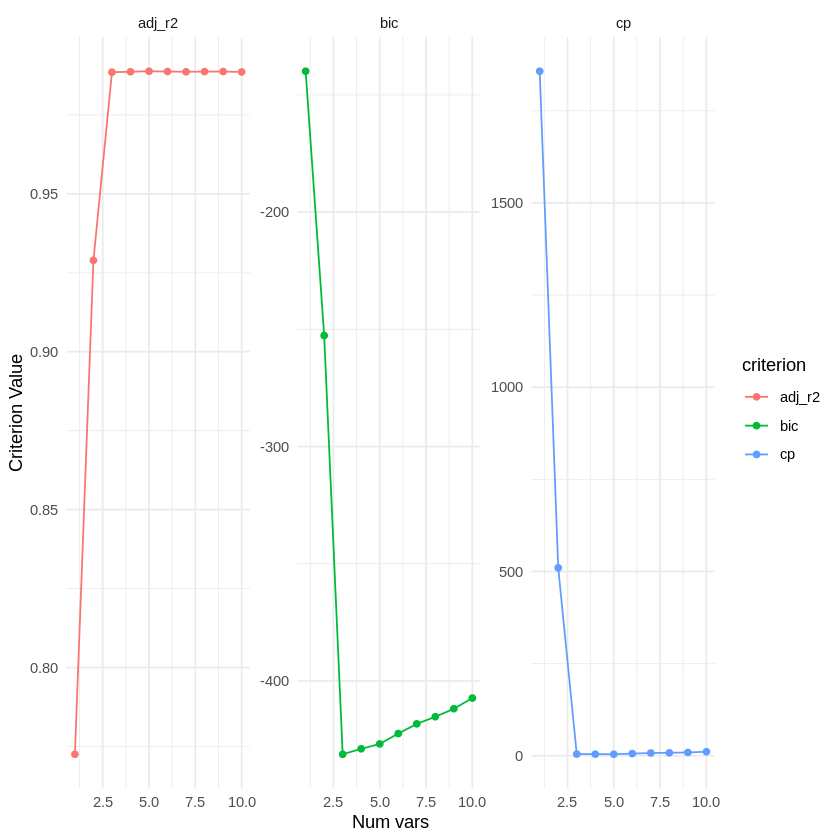

In [53]:
# WRITE YOUR CODE HERE
library(tidyverse)

results_df <- data.frame(
  model_size= 1:10,
  cp = subset_summary$cp,
  bic = subset_summary$bic,
  adj_r2 = subset_summary$adjr2
)

results_melted <- pivot_longer(results_df, cols = -model_size, names_to = "criterion", values_to = "value")

ggplot(data = results_melted, aes(x = model_size, y = value, color = criterion))+
  geom_line()+
  geom_point()+
  facet_wrap(~criterion, scales = "free_y")+
  theme_minimal()+
  labs(x = "Num vars",
       y = "Criterion Value")


> *Write your response here*
>

---
## 2. Forward and backwards stepwise selection (3 points)

Using the same simulated data from question 1, use forward stepwise selection, and backwards stepwise selections to determine the best model. Again, for both model selection methods, plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Report the coefficients of the best model.

a) Forward stepwise selection:

In [54]:
# WRITE YOUR CODE HERE
library(MASS)
full_model <- lm(Y ~ ., data = data)
null_model <- lm(Y ~ 1, data = data)
forward_model <- stepAIC(null_model, scope = list(lower = null_model, upper = full_model),
                         direction = "forward", trace = FALSE)

backward_model <- stepAIC(full_model, direction = "backward", trace = FALSE)

print("forward model")
summary(forward_model)


[1] "forward model"



Call:
lm(formula = Y ~ X3 + X2 + X + X10, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.89898 -0.64215  0.03297  0.58398  2.28186 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.856e+00  1.227e-01   31.43   <2e-16 ***
X3           9.242e-01  3.502e-02   26.39   <2e-16 ***
X2          -2.045e+00  8.383e-02  -24.40   <2e-16 ***
X            3.281e+00  1.457e-01   22.52   <2e-16 ***
X10          2.883e-05  1.948e-05    1.48    0.142    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9312 on 95 degrees of freedom
Multiple R-squared:  0.9891,	Adjusted R-squared:  0.9887 
F-statistic:  2157 on 4 and 95 DF,  p-value: < 2.2e-16


In [43]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here
#[1] "forward model"
#
#Call:
#lm(formula = Y ~ X3 + X2 + X + X4, data = data)
#
#Residuals:
#     Min       1Q   Median       3Q      Max
#-1.92308 -0.66625  0.07364  0.50067  1.84487
#
#Coefficients:
 #           Estimate Std. Error t value Pr(>|t|)
#(Intercept)  3.89853    0.12891  30.243   <2e-16 ***
#X3           0.90932    0.03914  23.230   <2e-16 ***
#X2          -1.75988    0.15472 -11.375   <2e-16 ***
#X            3.38937    0.13569  24.979   <2e-16 ***
#X4          -0.05620    0.02325  -2.417   0.0176 *
#---
##
#Residual standard error: 0.8454 on 95 degrees of freedom
#Multiple R-squared:  0.9877,	Adjusted R-squared:  0.9871
#F-statistic:  1900 on 4 and 95 DF,  p-value: < 2.2e-16
```

ERROR: Error in parse(text = x, srcfile = src): attempt to use zero-length variable name


b) Backwards stepwise selection:

In [55]:
# WRITE YOUR CODE HERE
print("backward model")
summary(backward_model)


[1] "backward model"



Call:
lm(formula = Y ~ X + X2 + X5 + X7 + X9, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.88057 -0.73258  0.05525  0.56069  1.93816 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.831497   0.120012  31.926  < 2e-16 ***
X            3.603650   0.177773  20.271  < 2e-16 ***
X2          -2.006123   0.078000 -25.719  < 2e-16 ***
X5           0.528671   0.079089   6.685 1.63e-09 ***
X7          -0.097666   0.023065  -4.234 5.34e-05 ***
X9           0.005568   0.001642   3.391  0.00102 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9244 on 94 degrees of freedom
Multiple R-squared:  0.9894,	Adjusted R-squared:  0.9888 
F-statistic:  1751 on 5 and 94 DF,  p-value: < 2.2e-16


In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here
#[1] "backward model"

#Call:
#lm(formula = Y ~ X + X3 + X4 + X6 + X7 + X8 + X10, data = data)

#Residuals:
#     Min       1Q   Median       3Q      Max
#-2.09573 -0.59752  0.04225  0.55813  1.91989
#
#Coefficients:
#             Estimate Std. Error t value Pr(>|t|)
#(Intercept)  3.678783   0.124317  29.592  < 2e-16 ***
#X            3.583517   0.247280  14.492  < 2e-16 ***
#X3           0.665382   0.183450   3.627 0.000470 ***
#X4          -2.435815   0.415266  -5.866 6.96e-08 ***
#X6           1.207103   0.352874   3.421 0.000933 ***
#X7           0.029369   0.016063   1.828 0.070731 .
#X8          -0.255400   0.095432  -2.676 0.008814 **
#X10          0.017110   0.007202   2.376 0.019593 *
#---
#Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

#Residual standard error: 0.8526 on 92 degrees of freedom
#Multiple R-squared:  0.9878,	Adjusted R-squared:  0.9869
#F-statistic:  1067 on 7 and 92 DF,  p-value: < 2.2e-16
```

c) Compare your results from parts a and b with those of question 1.

1.   List item
2.   List item



> *Write your response here*
> so the forward model is pretty decent because of r2 value. However, the backward isn't bad either. When comparing to the full model compairon it makes obvious that the selection is somewhat random in that when you are removing from the backward model you are removing that which explains the least variance but tht could effect downstream choices. Forward is similar to this but the opposite. I think that the full model sheds like on the fact that both the forward and backward model also showed that x3 was a good predictor. However, It is hard to see which is the best way to do it when comparing to full model comparison that iterates through all possibilities.

---
## 3. Training and test error (3 points)

This question will explore the relationship between training and test error and the number of features included in a model. We will again use a simulated dataset.

a) Simulate dataset with features $p = 20$ and observations $n = 1,000$. Generate data for a response variable $Y$ according to the model

$Y = X\beta + \epsilon$

where $\beta$ is random with some elements that are exactly zero.

Split your simulated dataset into a training set containing $n=100$ observations and a test set containing $n=900$ observations.

In [88]:
# WRITE YOUR CODE HERE
n <- 1000
p <- 20
n_train <- 100
n_test <- n - n_train

set.seed(128)
X <- matrix(rnorm(n * p), nrow = n, ncol = p)
beta <- ifelse(runif(p) <.2, 0, rnorm(p)) # beta are 0
#by adding in runif for 0 changes
epsilon <- rnorm(n, mean = 0, sd = 1)
Y <- X %*% beta + epsilon

df <- data.frame(Y = Y, X)

train_indices <- sample(1:n, n_train, replace = FALSE)
train_data <- df[train_indices, ]
test_data <- df[-train_indices, ]
dim(train_data)
dim(test_data)
summary(train_data)
summary(test_data)


[1] 100  21

[1] 900  21

       Y                   X1                  X2                 X3          
 Min.   :-12.47465   Min.   :-2.724251   Min.   :-2.06714   Min.   :-1.69746  
 1st Qu.: -2.94845   1st Qu.:-0.841353   1st Qu.:-0.73714   1st Qu.:-0.72688  
 Median :  0.07899   Median : 0.006832   Median :-0.04698   Median :-0.18276  
 Mean   :  0.54497   Mean   :-0.116536   Mean   :-0.05033   Mean   :-0.05372  
 3rd Qu.:  4.57104   3rd Qu.: 0.565181   3rd Qu.: 0.55440   3rd Qu.: 0.51466  
 Max.   : 12.89053   Max.   : 2.717139   Max.   : 2.00611   Max.   : 2.42217  
       X4                 X5                 X6                 X7         
 Min.   :-2.30057   Min.   :-4.06815   Min.   :-2.12887   Min.   :-2.5810  
 1st Qu.:-0.79312   1st Qu.:-0.58990   1st Qu.:-0.49567   1st Qu.:-0.5651  
 Median :-0.33939   Median : 0.06047   Median :-0.12500   Median : 0.1725  
 Mean   :-0.07886   Mean   :-0.04681   Mean   : 0.02682   Mean   : 0.1280  
 3rd Qu.: 0.58470   3rd Qu.: 0.55673   3rd Qu.: 0.58154   3rd Qu.: 

       Y                   X1                 X2                 X3          
 Min.   :-16.30135   Min.   :-3.49919   Min.   :-4.04747   Min.   :-2.74643  
 1st Qu.: -3.15153   1st Qu.:-0.69278   1st Qu.:-0.76675   1st Qu.:-0.75556  
 Median : -0.17878   Median :-0.05104   Median :-0.03415   Median :-0.08638  
 Mean   : -0.01885   Mean   :-0.03219   Mean   :-0.05875   Mean   :-0.04461  
 3rd Qu.:  3.07136   3rd Qu.: 0.61854   3rd Qu.: 0.66306   3rd Qu.: 0.65637  
 Max.   : 15.68863   Max.   : 3.18425   Max.   : 3.12336   Max.   : 2.82442  
       X4                 X5                  X6                  X7          
 Min.   :-2.49230   Min.   :-2.833020   Min.   :-3.101590   Min.   :-3.43186  
 1st Qu.:-0.67086   1st Qu.:-0.660412   1st Qu.:-0.671982   1st Qu.:-0.75979  
 Median : 0.02520   Median :-0.043656   Median : 0.002400   Median :-0.08738  
 Mean   : 0.05799   Mean   :-0.004886   Mean   : 0.004434   Mean   :-0.08401  
 3rd Qu.: 0.78408   3rd Qu.: 0.646994   3rd Qu.: 0.668198  

b) Perform best subset selection on the training set, and plot the associated training and test set MSE for the best model of each size.

> Add blockquote



In [89]:
# WRITE YOUR CODE HERE
subset_fit <- regsubsets(Y ~ ., data = train_data, nvmax = 20)
subset_summary <- summary(subset_fit)
subset_summary$which

,(Intercept),X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
1,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
2,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
3,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
4,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,⋯,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
5,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,⋯,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
6,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,⋯,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE
7,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,⋯,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE
8,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,⋯,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE
9,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,⋯,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE
10,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,⋯,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE


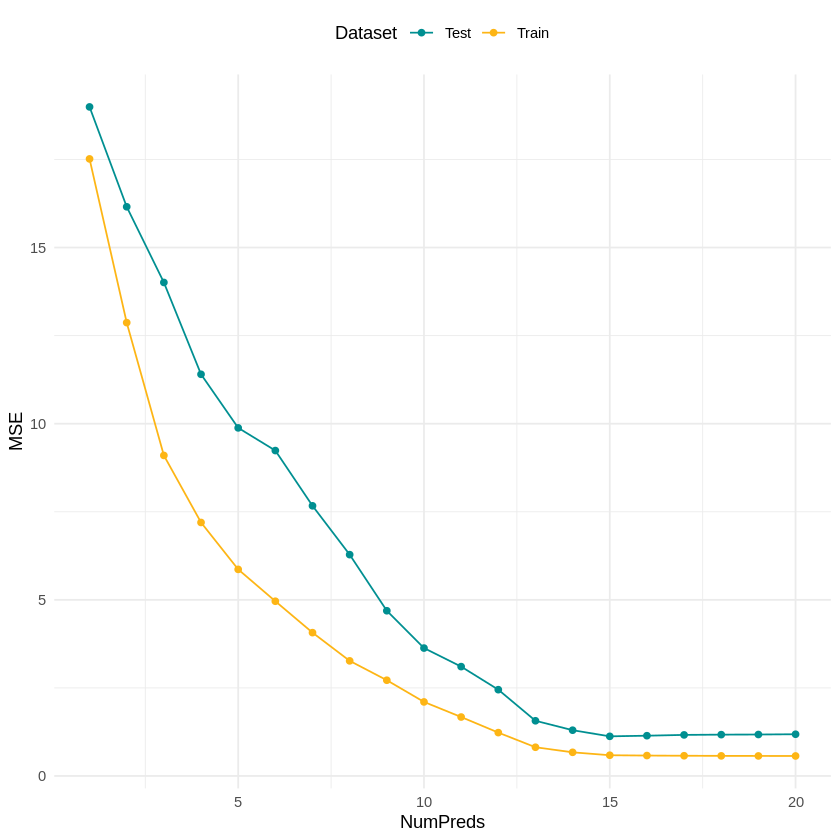

In [90]:
training_mse <- numeric(20)
testing_mse <- numeric(20)

for (i in 1:p) {
    included<-subset_summary$which[i, -1]
    predictors<-names(train_data)[-1][included]

    if (sum(included) > 0) {
        formula<-as.formula(paste("Y ~", paste(predictors, collapse = "+")))
    } else {
        formula<-as.formula("Y ~ 1")
    }
    model <-lm(formula, data = train_data)
    train_predictions <-predict(model, newdata = train_data)
    training_mse[i] <-mean((train_data$Y - train_predictions)^2)
    test_predictions <-predict(model, newdata = test_data)
    testing_mse[i] <-mean((test_data$Y - test_predictions)^2)
}

mse_data<-data.frame(
    ModelSize =rep(1:20, times=2),
    MSE = c(training_mse, testing_mse),
    DataSet = rep(c("Train", "Test"), each =20)
)

ggplot(mse_data, aes(x = ModelSize, y = MSE, color = DataSet)) +
    geom_line() +
    geom_point() +
    theme_minimal() +
    labs(x = "NumPreds",
         y = "MSE",
         color = "Dataset")+
    theme(legend.position = "top")+
    scale_color_manual(values=c("#008F91","#FDB515"))


:c) Identify the best model according the test MSE. How does this model compare to the actual model used to simulate the dataset?

*Note: If the model identified contains only an intercept or all of the features, then generate a new dataset (i.e. repeat part a with a different random seed) until the test set MSE is minimized for an intermediate model size.*

In [96]:
# WRITE YOUR CODE HERE
best_model_test <- mse_data%>%
  filter(DataSet=="Test")%>%
  arrange(MSE)%>%
  mutate(diff= MSE-min(MSE))%>%
  filter(diff<=0.01*min(MSE))%>%
  arrange(ModelSize)%>%
  slice(1)
best_model_size <- best_model$ModelSize
best_model_fit <- coef(subset_fit, id = best_model_size)

best_model_test
best_model_size
best_model_fit

ModelSize,MSE,DataSet,diff
<int>,<dbl>,<chr>,<dbl>
15,1.12552,Test,0


[1] 14

(Intercept)          X1          X6          X8          X9         X10 
  0.1641749  -1.1194624   1.6171117   0.6680679   2.0623542  -0.9892562 
        X11         X12         X13         X14         X15         X16 
 -1.4978706  -1.3107063  -0.9954361   0.8976711   0.9549423  -1.9710399 
        X17         X19         X20 
 -1.1275077  -0.9496546  -0.3967980

In [99]:
beta_indices <- which(beta != 0)
selected_model_indices <- c(1, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20)  # Indices from the selected model
actual_impactful <- sort(beta_indices)
predicted_impactful <- sort(selected_model_indices)
actual_impactful
predicted_impactful

[1]  1  5  6  8  9 10 11 12 13 14 15 16 17 19 20

[1]  1  6  8  9 10 11 12 13 14 15 16 17 19 20

> *Write your response here*
It does seem reasonably close to me. Especially when I experiemented with this across random seeds. It seems that most of the time that it is only 1 or 2 off. That is adding or removing a beta that was not indiced at 0. So I would say this is pretty successful as far as a comparison of the model made and the output.

**DUE:** 5pm EST, April 8, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*